In [4]:
%matplotlib inline

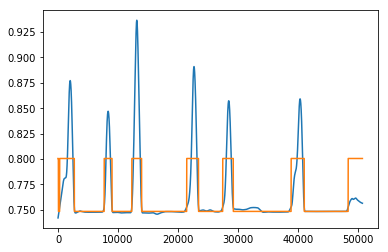

In [39]:
# complete example for alexandre
import matplotlib.pyplot as plt
# you may need to source /opt/ros/kinetic/setup.bash in order to import rosbag
import rosbag

# copy bag file to a txt for easy manipulation.
# Columns are time (of spoon message), spoon position and orientation, and most recent cap recording and orientation.
# a more advanced setup could interpolate cap pose to match spoon recording time.

bag = rosbag.Bag('data/2018-10-31-13-03-50_just_poses.bag')
counter = 0
last_spoon_msg = None;
last_hat_msg = None;
with open("pose_data_full_sample.txt", "w+") as f:
    for topic, msg, t in bag.read_messages(topics=['/vrpn_client_node/spoon/pose','/vrpn_client_node/manuelcap/pose']):
        if "spoon" in topic:
            last_spoon_msg = msg
        if "manuel" in topic:
            last_hat_msg = msg
      
        if last_spoon_msg and last_hat_msg and "spoon" in topic:
            f.write("%f,%f,%f,%f,%f,%f,%f,%f,%f,%f,%f,%f,%f,%f\n" % (
                last_spoon_msg.pose.position.x, last_spoon_msg.pose.position.y, last_spoon_msg.pose.position.z,
                last_spoon_msg.pose.orientation.w, last_spoon_msg.pose.orientation.x, 
                last_spoon_msg.pose.orientation.y, last_spoon_msg.pose.orientation.z,
                last_hat_msg.pose.position.x, last_hat_msg.pose.position.y, last_hat_msg.pose.position.z,
                last_hat_msg.pose.orientation.w, last_hat_msg.pose.orientation.x, 
                last_hat_msg.pose.orientation.y, last_hat_msg.pose.orientation.z))
        counter += 1
        # if you want a larger sample of data, increase this value
        if counter > 100000:
            break
    bag.close()

    
# set up hidden markov model parameters
from hmmlearn import hmm

# helper function to plot simple gaussian-emmision HMM model with n_components states
def plot_with_n_components(n_components, z_data):
    model = hmm.GaussianHMM(n_components=n_components, covariance_type="full", n_iter=100, params ="smtc")
    model.fit(z_data)
    est_z = model.predict(z_data)
    plt.plot(z_data)
    plt.plot(model.means_[est_z])

    
# now, read in the newly created txt file and model it and plot the resulting model
import numpy as np
from statsmodels.nonparametric.smoothers_lowess import lowess
all_data = np.loadtxt('pose_data_full_sample.txt', delimiter=',')
# see https://hmmlearn.readthedocs.io/en/latest/tutorial.html

# smooth the data
raw_z_data = all_data[:,2:3]
z_data = lowess(np.squeeze(raw_z_data), range(np.size(raw_z_data,0)), is_sorted=True, frac=0.025, it=0)[:,1:2]
# First division is the nice "waiting/feeding"
plot_with_n_components(2,z_data)


from statsmodels.nonparametric.smoothers_lowess import lowess
raw_z_data = all_data[:,2]
z_data = lowess(raw_z_data, np.arange(np.size(raw_z_data,0)), is_sorted=True, frac=0.025, it=0)

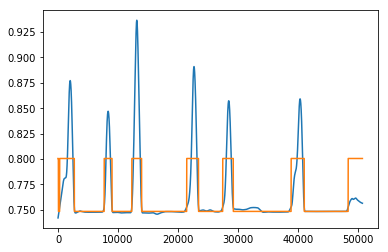

In [38]:
# smooth the data
raw_z_data = all_data[:,2:3]
z_data = lowess(np.squeeze(raw_z_data), range(np.size(raw_z_data,0)), is_sorted=True, frac=0.025, it=0)[:,1:2]
# First division is the nice "waiting/feeding"
plot_with_n_components(2,z_data)

In [4]:
import rosbag
bag = rosbag.Bag('data/2018-10-31-13-03-50_just_poses.bag')
counter = 0
   
with open("pose_data_full_1.txt", "w+") as f:
    for topic, msg, t in bag.read_messages(topics=['/vrpn_client_node/spoon/pose']):
        f.write("%f,%f,%f,%f,%f,%f,%f\n" % (msg.pose.position.x, msg.pose.position.y, msg.pose.position.z,
                             msg.pose.orientation.w, msg.pose.orientation.x, msg.pose.orientation.y, msg.pose.orientation.z))
        counter += 1
        if counter > 100000:
            break
    bag.close()

In [2]:
import rosbag
bag = rosbag.Bag('data/2018-10-31-13-03-50_just_poses.bag')
counter = 0

last_spoon_msg = None;
last_hat_msg = None;

with open("pose_data_full_1.txt", "w+") as f:
    for topic, msg, t in bag.read_messages(topics=['/vrpn_client_node/spoon/pose','/vrpn_client_node/manuelcap/pose']):
        if "spoon" in topic:
            last_spoon_msg = msg
        if "manuel" in topic:
            last_hat_msg = msg
      
        if last_spoon_msg and last_hat_msg and "spoon" in topic:
            f.write("%f,%f,%f,%f,%f,%f,%f,%f,%f,%f,%f,%f,%f,%f\n" % (
                last_spoon_msg.pose.position.x, last_spoon_msg.pose.position.y, last_spoon_msg.pose.position.z,
                last_spoon_msg.pose.orientation.w, last_spoon_msg.pose.orientation.x, 
                last_spoon_msg.pose.orientation.y, last_spoon_msg.pose.orientation.z,
                last_hat_msg.pose.position.x, last_hat_msg.pose.position.y, last_hat_msg.pose.position.z,
                last_hat_msg.pose.orientation.w, last_hat_msg.pose.orientation.x, 
                last_hat_msg.pose.orientation.y, last_hat_msg.pose.orientation.z))
        counter += 1
        if counter > 100000:
            break
    bag.close()

In [17]:
import numpy as np
all_data = np.loadtxt('/home/helvellyn/chefbot_ws/src/learn_trajectory/data/spoon_poses.txt', delimiter=',')

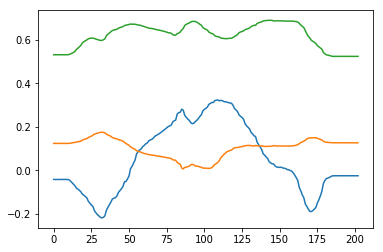

In [18]:
import matplotlib.pyplot as plt
plt.plot(all_data[:,1])
plt.plot(all_data[:,2])
plt.plot(all_data[:,3])



In [27]:
from hmmlearn import hmm
np.random.seed(42)

# params
num_states = 3
num_dims = 3
sticky = 0.8
#computed variables
nstick = (1-sticky)/(num_states-1.0)
min_vals = np.min(all_data,1)
max_vals = np.max(all_data,1)

In [30]:
# see https://hmmlearn.readthedocs.io/en/latest/tutorial.html
# sample from a fitted model
model = hmm.GaussianHMM(n_components=3, covariance_type="full")
model.startprob_ = np.ones(num_states) / num_states

model.transmat_ = np.full((num_states,num_states),nstick)
np.fill_diagonal(model.transmat_, sticky)

model.means_ = np.zeros((num_states,num_dims))
for i in range(1,num_states):
    model.means_[i,:] = np.random.uniform(min_vals[i], max_vals[i], num_states)
model.covars_ = np.tile(np.identity(num_dims), (num_states, 1, 1))
X, Z = model.sample(100)

In [35]:
def plot_with_n_components(n_components, z_data):
    model = hmm.GaussianHMM(n_components=n_components, covariance_type="full", n_iter=100, params ="smtc")
    model.fit(z_data)
    est_z = model.predict(z_data)
    plt.plot(z_data)
    plt.plot(model.means_[est_z])

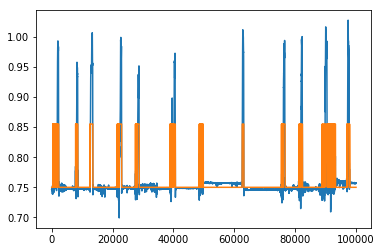

In [36]:
# see https://hmmlearn.readthedocs.io/en/latest/tutorial.html
# sample from a fitted model
# First division is the nice "waiting/feeding"
z_data = all_data[:,2:3]
plot_with_n_components(2,z_data)

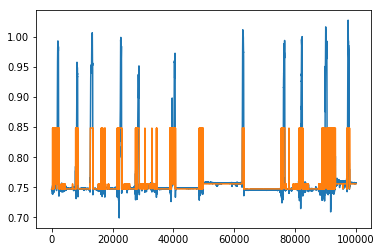

In [37]:
##Identifies two waiting states when you go to three
##Note that natively it can wind up with pretty high-freq oscillations between two "ground" states
plot_with_n_components(3,z_data)

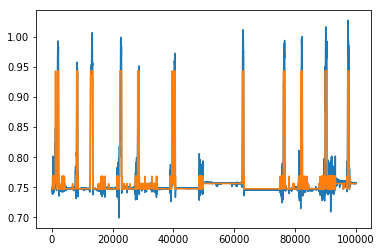

In [38]:
##Identifies two waiting states when you go to three
##Note that natively it can wind up with pretty high-freq oscillations between two "ground" states
plot_with_n_components(4,z_data)

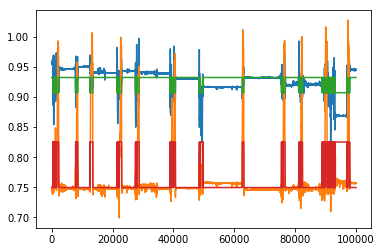

In [41]:
# What if we try with all dimensions?
plot_with_n_components(2,all_data[:,1:3])